In [18]:
# Aprendizado não supervisionado
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [21]:
clienteID = np.array([0,1,2,3,4,5,6,7,8,9,10])
valorCompra = np.array([40.0, 150.0, 500.0, 5000.0, 1834.0, 2350.0, 5000.0, 6740.0, 895.0, 3300.0, 4750.0])
dadosCompras = np.column_stack((clienteID,valorCompra))

In [23]:
dadosCompras


array([[0.000e+00, 4.000e+01],
       [1.000e+00, 1.500e+02],
       [2.000e+00, 5.000e+02],
       [3.000e+00, 5.000e+03],
       [4.000e+00, 1.834e+03],
       [5.000e+00, 2.350e+03],
       [6.000e+00, 5.000e+03],
       [7.000e+00, 6.740e+03],
       [8.000e+00, 8.950e+02],
       [9.000e+00, 3.300e+03],
       [1.000e+01, 4.750e+03]])

In [24]:
# algoritmo kmeans
kmeans = KMeans(n_clusters=3) #define o numero de clusters
kmeans.fit(dadosCompras)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [25]:
# avaliar o desempenho do aldoritmo kmeans
sse = kmeans.inertia_
print("sse: ", sse)

sse:  4088192.1666666665


In [27]:
# visualização dos cluters
labels = kmeans.labels_ # label dos dados
centroids = kmeans.cluster_centers_ # centro dos grupos

Text(0, 0.5, 'Valor da Compra')

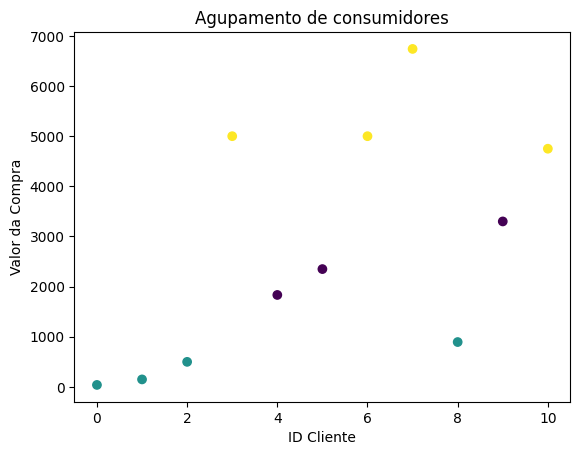

In [30]:
# plotar gráficos de dispersão

plt.scatter(dadosCompras[:,0], dadosCompras[:,1], c=labels)
plt.title('Agupamento de consumidores')
plt.xlabel('ID Cliente')
plt.ylabel('Valor da Compra')

In [31]:
# cria varialvel para armazenar o dataframe com os dados das compras

dadosCompras_df = pd.DataFrame(dadosCompras, columns=['clienteID', 'valorCompra'])
#cria o grupo com as labels
dadosCompras_df['Grupo'] = labels
#agrupa os dados com o groupby calculando sua média
grouped_data = dadosCompras_df.groupby('Grupo').mean()
print(grouped_data)

       clienteID  valorCompra
Grupo                        
0           6.00  2494.666667
1           2.75   396.250000
2           6.50  5372.500000
